In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(display = 'diagram')

In [48]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [49]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [50]:
len(df)

2290

In [51]:
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [53]:
df = pd.read_csv('gld_price_data.csv', parse_dates = ['Date'])

In [54]:
df['Month'] = df['Date'].dt.month

In [55]:
df['Year'] = df['Date'].dt.year

In [56]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD,Month,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,1,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,1,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,1,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,1,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,1,2008
...,...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,5,2018
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,5,2018
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,5,2018
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,5,2018


In [57]:
df = df.drop(columns = ['Date'])

In [58]:
df.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
Month      0
Year       0
dtype: int64

In [59]:
df.shape

(2290, 7)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   Month    2290 non-null   int64  
 6   Year     2290 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 125.4 KB


In [61]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD,Month,Year
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,6.329258,2012.724891
std,519.111540,23.283346,19.523517,7.092566,0.131547,3.591149,2.993271
min,676.530029,70.000000,7.960000,8.850000,1.039047,1.000000,2008.000000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,3.000000,2010.000000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,6.000000,2013.000000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,10.000000,2015.000000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,12.000000,2018.000000


In [62]:
import seaborn as sns
correlation = df.corr()

<AxesSubplot:>

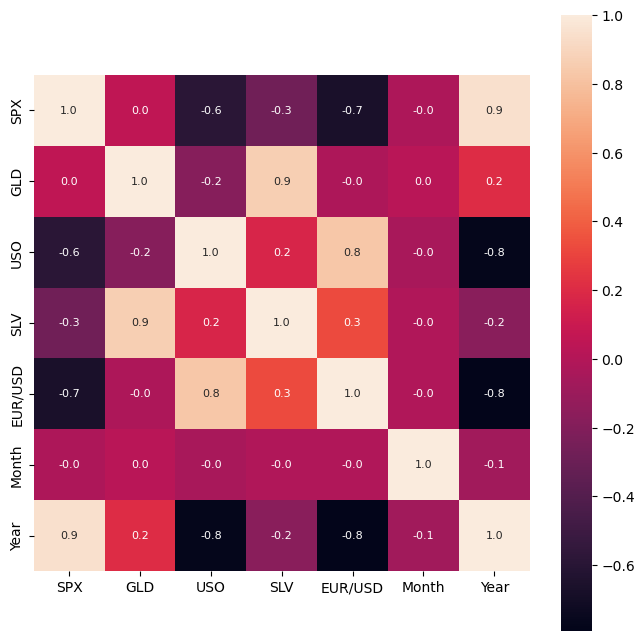

In [63]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})


In [64]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Month      0.020494
Year       0.206654
Name: GLD, dtype: float64


C:\Users\admin\anaconda3\envs\project1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='GLD', ylabel='Density'>

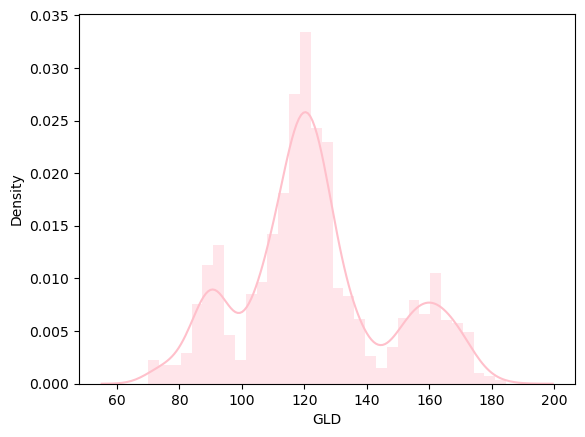

In [65]:
sns.distplot(df['GLD'], color = 'pink')

In [66]:
X = df.drop(columns = ['GLD'])
y = df['GLD']

In [67]:
X

,SPX,USO,SLV,EUR/USD,Month,Year
0,1447.160034,78.470001,15.1800,1.471692,1,2008
1,1447.160034,78.370003,15.2850,1.474491,1,2008
2,1411.630005,77.309998,15.1670,1.475492,1,2008
3,1416.180054,75.500000,15.0530,1.468299,1,2008
4,1390.189941,76.059998,15.5900,1.557099,1,2008
...,...,...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789,5,2018
2286,2697.790039,14.370000,15.5300,1.184722,5,2018
2287,2723.070068,14.410000,15.7400,1.191753,5,2018
2288,2730.129883,14.380000,15.5600,1.193118,5,2018


In [68]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
X_train.head()

,SPX,USO,SLV,EUR/USD,Month,Year
486,1165.810059,39.560001,16.600000,1.356705,3,2010
31,1349.989990,75.930000,16.952000,1.467610,2,2008
1754,2041.890015,10.740000,13.080000,1.087453,12,2015
1490,1862.760010,31.100000,16.670000,1.280442,10,2014
1526,2026.140015,23.280001,16.370001,1.239495,12,2014


In [71]:
numeric_feature = X_train.select_dtypes('number').columns

In [72]:
numeric_transformer = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())

In [73]:
col_transformer = make_column_transformer(
  (numeric_transformer, numeric_feature), 
remainder = 'passthrough')

In [74]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Month', 'Year'], dtype='object'))])

In [75]:
pipe = make_pipeline(col_transformer, RandomForestRegressor())

In [76]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Month', 'Year'], dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [77]:
from sklearn.model_selection import cross_validate
with_categorical_score = cross_validate(pipe, X_train, y_train, return_train_score = True)

In [78]:
categorical_score = pd.DataFrame(with_categorical_score)
categorical_score

,fit_time,score_time,test_score,train_score
0,0.586784,0.031248,0.994248,0.999238
1,0.616287,0.025312,0.995341,0.999356
2,0.507074,0.018281,0.994429,0.999314
3,0.559299,0.015625,0.995117,0.999225
4,0.483602,0.027509,0.995168,0.999140


In [79]:
pipe.predict(X_test)

array([127.27039911, 117.08879963, 139.52520074, 121.19050051,
        94.01879978, 154.33810125, 117.66180131, 113.36560146,
       152.73349953, 105.75300047, 103.12029938, 120.20810082,
        92.23789913, 159.41110021, 121.53629873, 117.2312016 ,
        86.76279874,  91.9311995 ,  92.85169973, 125.63200048,
        84.10739898, 117.08569871, 126.69699847, 173.66239727,
       167.97949683, 138.8417026 , 114.37439949, 159.73810136,
       133.95240139, 116.00380013, 112.08250029, 104.96920175,
       128.05669995, 122.00669992,  98.62019962, 121.06709919,
        84.7314    , 115.01200024, 127.38709882, 139.7292998 ,
       103.51500017, 131.09850201, 108.66400007, 134.6326996 ,
       133.5921988 , 150.09779942, 119.56880073, 158.57180082,
       159.38430131, 127.58949996, 123.30550063, 113.84429923,
       123.44330045, 118.79469985, 153.84929989, 122.38209972,
       112.34530021,  86.79120002, 155.81989964, 117.98020109,
        88.41479955, 114.60890001,  83.37449925, 146.58

In [80]:
pipe.score(X_train, y_train)

0.9993414873871957

In [81]:
pipe.score(X_test, y_test)

0.9960149479510495